In [1]:
import sys,array
from ROOT import TFile, TCanvas
import root_numpy as rn
import numpy as np
import math
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
#matplotlib.rcParams['font.size'] = 16
#matplotlib.rcParams['font.family'] = 'serif'
#matplotlib.rcParams['font.weight'] = 'bold'

matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{xfrac,fontspec,unicode-math}"]
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{mathastext}"]

font = 22   
legendfont = 18
matplotlib.rc('font',weight='bold')
matplotlib.rc('font',size=font)
matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']#matplotlib.rc('text', usetex=True)

/Library/Python/2.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.12.1 is currently installed but you installed root_numpy against numpy 1.8.0rc1. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [27]:
name = 'sel2'
stage=name

f = '/Volumes/UBooNEDataMCC8/MCC8_3/AnaFiles/MCBNBCos/BT_backgrounds_%s.root'%stage
on ='/Volumes/UBooNEDataMCC8/MCC8_3/AnaFiles/OnBeam/BT_backgrounds_%s.root'%stage
off='/Volumes/UBooNEDataMCC8/MCC8_3/AnaFiles/OffBeam/BT_backgrounds_%s.root'%stage

t = rn.root2array(f,treename='tree')
df = pd.DataFrame(t)

a = rn.root2array(on,treename='tree')
df0 = pd.DataFrame(a)

b = rn.root2array(off,treename='tree')
df1 = pd.DataFrame(b)

df['pi0_totalE'] = df['pi0_low_shrE'] + df['pi0_high_shrE']
df0['pi0_totalE'] = df0['pi0_low_shrE'] + df0['pi0_high_shrE']
df1['pi0_totalE'] = df1['pi0_low_shrE'] + df1['pi0_high_shrE']

df['pi0_Easym'] =  (df['pi0_high_shrE'] -  df['pi0_low_shrE']  ) / (df['pi0_high_shrE']  + df['pi0_low_shrE'] )
df0['pi0_Easym'] = (df0['pi0_high_shrE'] - df0['pi0_low_shrE'] ) / (df0['pi0_high_shrE'] + df0['pi0_low_shrE'] )
df1['pi0_Easym'] = (df1['pi0_high_shrE'] - df1['pi0_low_shrE'] ) / (df1['pi0_high_shrE'] + df1['pi0_low_shrE'] )


df['mu_endx'] = np.where(df.mu_startx-df.vtx_x == 0, df.mu_endx, df.mu_startx)
df['mu_endy'] = np.where(df.mu_starty - df.vtx_y == 0, df.mu_endy, df.mu_starty)
df['mu_endz'] = np.where(df.mu_startz - df.vtx_z == 0, df.mu_endz, df.mu_startz)

df0['mu_endx'] = np.where(df0.mu_startx - df0.vtx_x == 0, df0.mu_endx, df0.mu_startx)
df0['mu_endy'] = np.where(df0.mu_starty - df0.vtx_y == 0, df0.mu_endy, df0.mu_starty)
df0['mu_endz'] = np.where(df0.mu_startz - df0.vtx_z == 0, df0.mu_endz, df0.mu_startz)

df1['mu_endx'] = np.where(df1.mu_startx - df1.vtx_x == 0, df1.mu_endx, df1.mu_startx)
df1['mu_endy'] = np.where(df1.mu_starty - df1.vtx_y == 0, df1.mu_endy, df1.mu_starty)
df1['mu_endz'] = np.where(df1.mu_startz - df1.vtx_z == 0, df1.mu_endz, df1.mu_startz)

df['mu_startx'] = df['vtx_x']
df['mu_starty'] = df['vtx_y']
df['mu_startz'] = df['vtx_z']

df0['mu_startx'] = df0['vtx_x']
df0['mu_starty'] = df0['vtx_y']
df0['mu_startz'] = df0['vtx_z']

df['tot_hits_0'] = df['n_track_hits_0'] + df['n_shower_hits_0']
df['tot_hits_1'] = df['n_track_hits_1'] + df['n_shower_hits_1']
df['tot_hits_2'] = df['n_track_hits_2'] + df['n_shower_hits_2']
df0['tot_hits_0'] = df0['n_track_hits_0'] + df0['n_shower_hits_0']
df0['tot_hits_1'] = df0['n_track_hits_1'] + df0['n_shower_hits_1']
df0['tot_hits_2'] = df0['n_track_hits_2'] + df0['n_shower_hits_2']
df1['tot_hits_0'] = df1['n_track_hits_0'] + df1['n_shower_hits_0']
df1['tot_hits_1'] = df1['n_track_hits_1'] + df1['n_shower_hits_1']
df1['tot_hits_2'] = df1['n_track_hits_2'] + df1['n_shower_hits_2']


In [28]:
print df0.shape, df1.shape, df.shape

(3753, 96) (260, 96) (36638, 96)


In [29]:
oth_v = df.query('bkgd_id == 0') #noise
cos_v = df.query('bkgd_id == 1')
cc1pi0_v = df.query('bkgd_id == 2')
nc1pi0_v = df.query('bkgd_id == 3')
cc1pi0_outFV_v = df.query('bkgd_id == 4')
multpi0_v = df.query('bkgd_id == 5')
nue_v = df.query('bkgd_id == 6')
antinumu_v = df.query('bkgd_id == 7')
cccex_v = df.query('bkgd_id == 8 ')
nccex_v = df.query('bkgd_id == 9')
ccgamma_v = df.query('bkgd_id == 10')
kaon_v = df.query('bkgd_id == 11')
ccoth_v = df.query('bkgd_id == 12 or bkgd_id == 11')
ncoth_v = df.query('bkgd_id == 13 or bkgd_id == 9')

all_but_sig_v = df.query('bkgd_id != 2')

In [30]:
print float(ccgamma_v.shape[0] ) / df.shape[0]
print ccgamma_v.shape[0], df.shape[0]

0.00204705497025
75 36638


In [31]:
# This one is for pi0 shower
# break ccoth into :
# CCoth -> shower is a reco'd track (cosmic or neutrino)
#       -> shower is reco'd noise
#       -> shower is a reco'd cosmic shower
#       -> shower is a reco'd neutrino shower (non-pi0)

# from pi0 : (1)
# origin: cosmic (2), neutrino (1), noise (-1)
# type: track (0), shower (1), noise (-1)

cc1pi0_both_nupi0_v = cc1pi0_v.query('pi0_low_from_pi0 == 1 & pi0_high_from_pi0 == 1')
cc1pi0_one_nupi0_v = cc1pi0_v.query('(pi0_low_from_pi0 == 1 & pi0_high_from_pi0 == 0) | (pi0_low_from_pi0 == 0 & pi0_high_from_pi0 == 1)')
cc1pi0_neither_nupi0_v = cc1pi0_v.query('pi0_low_from_pi0 != 1 & pi0_high_from_pi0 != 1')

print 'All: ',cc1pi0_v.shape[0]
print 'Both, one, neither pi0: ', cc1pi0_both_nupi0_v.shape[0], cc1pi0_one_nupi0_v.shape[0], cc1pi0_neither_nupi0_v.shape[0]


cc1pi0_one_nupi0_both_nu_v = cc1pi0_one_nupi0_v.query('pi0_low_origin == 1 & pi0_high_origin == 1')
cc1pi0_one_nupi0_one_nushr_v = cc1pi0_one_nupi0_both_nu_v.query('pi0_low_type == 1 & pi0_high_type == 1')
cc1pi0_one_nupi0_one_nutrk_v = cc1pi0_one_nupi0_both_nu_v.query('(pi0_low_type == 1 & pi0_high_type==0) | (pi0_low_type == 0 & pi0_high_type == 1) ')

cc1pi0_one_nupi0_one_cosmic_v = cc1pi0_one_nupi0_v.query('(pi0_low_origin == 1 & pi0_high_origin == 2) | (pi0_low_origin == 2 & pi0_high_origin == 1) ')

print '  One - both nu : ', cc1pi0_one_nupi0_both_nu_v.shape[0]
print '  One - one nu shr: ', cc1pi0_one_nupi0_one_nushr_v.shape[0]
print '  One - one nu trk: ', cc1pi0_one_nupi0_one_nutrk_v.shape[0]
print '  One - one cosmic: ', cc1pi0_one_nupi0_one_cosmic_v.shape[0]

cc1pi0_neither_nupi0_both_nu_v = cc1pi0_neither_nupi0_v.query('pi0_low_origin == 1 & pi0_high_origin == 1')
cc1pi0_neither_nupi0_both_nushr_v = cc1pi0_neither_nupi0_both_nu_v.query('pi0_low_type == 1 & pi0_high_type == 1')
cc1pi0_neither_nupi0_oneshr_onetrk_v = cc1pi0_neither_nupi0_both_nu_v.query('(pi0_low_type == 1 & pi0_high_type == 0) | (pi0_low_type == 0 & pi0_high_type == 1)')
cc1pi0_neither_nupi0_both_nutrk_v = cc1pi0_neither_nupi0_both_nu_v.query('pi0_low_type == 0 & pi0_high_type == 0')

cc1pi0_neither_nupi0_onenu_onecos_v = cc1pi0_neither_nupi0_v.query('(pi0_low_origin == 1 & pi0_high_origin == 2) | (pi0_low_origin == 2 & pi0_high_origin == 1)')
cc1pi0_neither_nupi0_bothcos_v = cc1pi0_neither_nupi0_v.query('(pi0_low_origin == 2 & pi0_high_origin == 2)')

print 'Both from pi0 shower: ', cc1pi0_both_nupi0_v.shape[0]
print ' 1pi0,1nushr; 1pi0,1nutrk; 1pi0,1cosmic: ', cc1pi0_one_nupi0_one_nushr_v.shape[0],cc1pi0_one_nupi0_one_nutrk_v.shape[0],cc1pi0_one_nupi0_one_cosmic_v.shape[0]
print ' 2nushr; 1nushr,1nutrk; 2nutrk; 1nu,1cos; 2cos: ', cc1pi0_neither_nupi0_both_nushr_v.shape[0], cc1pi0_neither_nupi0_oneshr_onetrk_v.shape[0],\
cc1pi0_neither_nupi0_both_nutrk_v.shape[0], cc1pi0_neither_nupi0_onenu_onecos_v.shape[0], cc1pi0_neither_nupi0_bothcos_v.shape[0]


#print cc1pi0_shr_nopi0_nu_v.event.values
#print cc1pi0_shr_nopi0_nu_v.mu_origin

All:  2501
Both, one, neither pi0:  0 0 2501
  One - both nu :  0
  One - one nu shr:  0
  One - one nu trk:  0
  One - one cosmic:  0
Both from pi0 shower:  0
 1pi0,1nushr; 1pi0,1nutrk; 1pi0,1cosmic:  0 0 0
 2nushr; 1nushr,1nutrk; 2nutrk; 1nu,1cos; 2cos:  0 0 0 0 0


In [32]:
# This one is for pi0 shower
# break ccoth into :
# CCoth -> shower is a reco'd track (cosmic or neutrino)
#       -> shower is reco'd noise
#       -> shower is a reco'd cosmic shower
#       -> shower is a reco'd neutrino shower (non-pi0)

# from pi0 : (1)
# origin: cosmic (2), neutrino (1)
# type: track (0), shower (1), noise (-1)

print ccoth_v.shape[0]
ccoth_both_nupi0_v = ccoth_v.query('pi0_low_from_pi0 == 1 & pi0_high_from_pi0 == 1')
ccoth_one_nupi0_v = ccoth_v.query('(pi0_low_from_pi0 == 1 & pi0_high_from_pi0 == 0) | (pi0_low_from_pi0 == 0 & pi0_high_from_pi0 == 1)')
ccoth_neither_nupi0_v = ccoth_v.query('pi0_low_from_pi0 != 1 & pi0_high_from_pi0 != 1')

print 'All: ',ccoth_v.shape[0]
print 'Both, one, neither pi0: ', ccoth_both_nupi0_v.shape[0], ccoth_one_nupi0_v.shape[0], ccoth_neither_nupi0_v.shape[0]

ccoth_one_nupi0_both_nu_v = ccoth_one_nupi0_v.query('pi0_low_origin == 1 & pi0_high_origin == 1')
ccoth_one_nupi0_one_nushr_v = ccoth_one_nupi0_both_nu_v.query('pi0_low_type == 1 & pi0_high_type == 1')
ccoth_one_nupi0_one_nutrk_v = ccoth_one_nupi0_both_nu_v.query('(pi0_low_type == 1 & pi0_high_type==0) | (pi0_low_type == 0 & pi0_high_type == 1) ')

ccoth_one_nupi0_one_cosmic_v = ccoth_one_nupi0_v.query('(pi0_low_origin == 1 & pi0_high_origin == 2) | (pi0_low_origin == 2 & pi0_high_origin == 1) ')

#print '  One - both nu : ', ccoth_one_nupi0_both_nu_v.shape[0]
#print '  One - one nu shr: ', ccoth_one_nupi0_one_nushr_v.shape[0]
#print '  One - one nu trk: ', ccoth_one_nupi0_one_nutrk_v.shape[0]
#print '  One - one cosmic: ', ccoth_one_nupi0_one_cosmic_v.shape[0]

ccoth_neither_nupi0_both_nu_v = ccoth_neither_nupi0_v.query('pi0_low_origin == 1 & pi0_high_origin == 1')
ccoth_neither_nupi0_both_nushr_v = ccoth_neither_nupi0_both_nu_v.query('pi0_low_type == 1 & pi0_high_type == 1')
ccoth_neither_nupi0_oneshr_onetrk_v = ccoth_neither_nupi0_both_nu_v.query('(pi0_low_type == 1 & pi0_high_type == 0) | (pi0_low_type == 0 & pi0_high_type == 1)')
ccoth_neither_nupi0_both_nutrk_v = ccoth_neither_nupi0_both_nu_v.query('pi0_low_type == 0 & pi0_high_type == 0')

ccoth_neither_nupi0_onenu_onecos_v = ccoth_neither_nupi0_v.query('(pi0_low_origin == 1 & pi0_high_origin == 2) | (pi0_low_origin == 2 & pi0_high_origin == 1)')
ccoth_neither_nupi0_onenushr_onecos_v = ccoth_neither_nupi0_onenu_onecos_v.query('(pi0_low_origin == 1 & pi0_low_type == 1) | (pi0_high_origin == 1 & pi0_high_type == 1 )')
ccoth_neither_nupi0_onenutrk_onecos_v = ccoth_neither_nupi0_onenu_onecos_v.query('(pi0_low_origin == 1 & pi0_low_type == 0) | (pi0_high_origin == 1 & pi0_high_type == 0 )')

print ccoth_neither_nupi0_v.shape
print ccoth_neither_nupi0_onenu_onecos_v.shape
print ccoth_neither_nupi0_onenushr_onecos_v.shape

ccoth_neither_nupi0_bothcos_v = ccoth_neither_nupi0_v.query('(pi0_low_origin == 2 & pi0_high_origin == 2)')
#print ccoth_neither_nupi0_bothcos_v.shape

print 'Both from pi0 shower: ', ccoth_both_nupi0_v.shape[0]
print ' 1pi0,1nushr; 1pi0,1nutrk; 1pi0,1cosmic: ', ccoth_one_nupi0_one_nushr_v.shape[0],ccoth_one_nupi0_one_nutrk_v.shape[0],ccoth_one_nupi0_one_cosmic_v.shape[0]
print ' 2nushr; 1nushr,1nutrk; 2nutrk; 1nu,1cos; 2cos: ', ccoth_neither_nupi0_both_nushr_v.shape[0], ccoth_neither_nupi0_oneshr_onetrk_v.shape[0],\
ccoth_neither_nupi0_both_nutrk_v.shape[0], ccoth_neither_nupi0_onenu_onecos_v.shape[0], ccoth_neither_nupi0_bothcos_v.shape[0]


print ' 1 nu shr, 1 cos: ', ccoth_neither_nupi0_onenushr_onecos_v.shape[0]
print ' 1 nu trk, 1 cos: ', ccoth_neither_nupi0_onenutrk_onecos_v.shape[0]

#print cc1pi0_shr_nopi0_nu_v.event.values
#print cc1pi0_shr_nopi0_nu_v.mu_origin

30189
All:  30189
Both, one, neither pi0:  0 0 30189
(30189, 96)
(0, 96)
(0, 96)
Both from pi0 shower:  0
 1pi0,1nushr; 1pi0,1nutrk; 1pi0,1cosmic:  0 0 0
 2nushr; 1nushr,1nutrk; 2nutrk; 1nu,1cos; 2cos:  0 0 0 0 0
 1 nu shr, 1 cos:  0
 1 nu trk, 1 cos:  0


In [33]:
#print ccoth_one_nupi0_one_nutrk_v.event.values
#print ccoth_neither_nupi0_oneshr_onetrk_v.event.values
#print ccoth_neither_nupi0_both_nutrk_v.event.values
#print ccoth_neither_nupi0_onenushr_onecos_v.event.values
#print ccoth_neither_nupi0_onenutrk_onecos_v.event.values


In [34]:
# This one is for single shower
# break ccoth into :
# CCoth -> shower is a reco'd track (cosmic or neutrino)
#       -> shower is reco'd noise
#       -> shower is a reco'd cosmic shower
#       -> shower is a reco'd neutrino shower (non-pi0)

# from pi0 : (1)
# origin: cosmic (2), neutrino (1)
# type: track (0), shower (1), noise (-1)
ccoth_trk_nu_v = ccoth_v.query('gamma_type == 0 & gamma_origin == 1')
ccoth_trk_cos_v = ccoth_v.query('gamma_type == 0 & gamma_origin == 2')

ccoth_shr_pi0_nu_v = ccoth_v.query('gamma_type == 1 & gamma_origin == 1 & gamma_from_pi0 == 1')
ccoth_shr_nopi0_nu_v = ccoth_v.query('gamma_type == 1 & gamma_origin == 1 & gamma_from_pi0 ==0')

ccoth_shr_cos_v = ccoth_v.query('gamma_type == 1 & gamma_origin == 2')
ccoth_noise_v = ccoth_v.query('gamma_type == -1')

cc1pi0_trk_nu_v = cc1pi0_v.query('gamma_type == 0 & gamma_origin == 1')
cc1pi0_trk_cos_v = cc1pi0_v.query('gamma_type == 0 & gamma_origin == 2')
cc1pi0_shr_pi0_nu_v = cc1pi0_v.query('gamma_type == 1 & gamma_origin == 1 & gamma_from_pi0 == 1')
cc1pi0_shr_nopi0_nu_v = cc1pi0_v.query('gamma_type == 1 & gamma_origin == 1 & gamma_from_pi0 == 0')

cc1pi0_shr_cos_v = cc1pi0_v.query('gamma_type == 1 & gamma_origin == 2')
cc1pi0_noise_v = cc1pi0_v.query('gamma_type == -1')

print ccoth_trk_nu_v.shape[0] ,ccoth_trk_cos_v.shape[0] , ccoth_shr_nopi0_nu_v.shape[0], ccoth_shr_pi0_nu_v.shape[0], ccoth_shr_cos_v.shape[0], ccoth_noise_v.shape[0] ,ccoth_v.shape[0]
#print cc1pi0_trk_nu_v.shape[0] , cc1pi0_trk_cos_v.shape[0] ,cc1pi0_shr_nopi0_nu_v.shape[0],cc1pi0_shr_pi0_nu_v.shape[0], cc1pi0_shr_cos_v.shape[0], cc1pi0_noise_v.shape[0] ,cc1pi0_v.shape[0]
print ccoth_shr_nopi0_nu_v.event.values #, ccoth_shr_nopi0_nu_v.shape[0]

0 0 0 0 0 30189 30189
[]


In [35]:
print 'Cosmic MC : ', cos_v.shape[0]
print 'CC1pi0: ', cc1pi0_v.shape[0]
print 'CC0pi0: ', cccex_v.shape[0] + ccgamma_v.shape[0] +ccoth_v.shape[0]
print 'NCpi0: ', nc1pi0_v.shape[0] 
print 'NC0pi0: ', ncoth_v.shape[0]
print 'Other : ', oth_v.shape[0] + cc1pi0_outFV_v.shape[0] + multpi0_v.shape[0] + nue_v.shape[0]+antinumu_v.shape[0]
#print 'Cosmic Data :', 

Cosmic MC :  1722
CC1pi0:  2501
CC0pi0:  30826
NCpi0:  149
NC0pi0:  839
Other :  601


In [36]:
#tot_on = 544751
#tot_off = 213095 #218466 #379202
#tot_bnbcos = 420400 #206500 #384200 #101600
#int_per_1e20POT = 99035.2 
#dataPOT = 0.495 * (tot_on) / 567157 #547616  
#mcbnbcos_POT = float(tot_bnbcos)/int_per_1e20POT 
#off_to_on = 1.23 * (400675./tot_off) * (tot_on/567157.)
#mc_to_onbeam = dataPOT/mcbnbcos_POT

dataPOT = 0.492
mcbnbcos_POT = 4.23214
off_to_on = 2.168404449
mc_to_onbeam = dataPOT/mcbnbcos_POT
print "POTS : ", dataPOT, mcbnbcos_POT 
print "MC to OnBeam : ", mc_to_onbeam
print "Off to OnBeam: ",off_to_on

var = 'mu_startx'

oth_w = [ mc_to_onbeam for i in xrange(len(oth_v[var].values)) ] 
cos_w = [ mc_to_onbeam for i in xrange(len(cos_v[var].values)) ] 
nc1pi0_w = [ mc_to_onbeam for i in xrange(len(nc1pi0_v[var].values)) ] 
cc1pi0_outFV_w = [ mc_to_onbeam for i in xrange(len(cc1pi0_outFV_v[var].values)) ] 
multpi0_w = [ mc_to_onbeam for i in xrange(len(multpi0_v[var].values)) ] 
nue_w = [ mc_to_onbeam for i in xrange(len(nue_v[var].values)) ] 
antinumu_w = [ mc_to_onbeam for i in xrange(len(antinumu_v[var].values)) ] 
cccex_w = [ mc_to_onbeam for i in xrange(len(cccex_v[var].values)) ] 
nccex_w = [ mc_to_onbeam for i in xrange(len(nccex_v[var].values)) ] 
ccgamma_w = [ mc_to_onbeam for i in xrange(len(ccgamma_v[var].values)) ] 
kaon_w = [ mc_to_onbeam for i in xrange(len(kaon_v[var].values)) ] 
ccoth_w = [ mc_to_onbeam for i in xrange(len(ccoth_v[var].values)) ] 
ncoth_w = [ mc_to_onbeam for i in xrange(len(ncoth_v[var].values)) ] 
sig_w = [ mc_to_onbeam for i in xrange(len(cc1pi0_v[var].values)) ] 

cos_ext_w = [ off_to_on for i in xrange(df1.shape[0]) ] 
all_w = [ mc_to_onbeam for i in xrange(len(df[var].values)) ] 

tot = len(all_w) * mc_to_onbeam + len(cos_ext_w) * off_to_on
print tot

POTS :  0.492 4.23214
MC to OnBeam :  0.11625324304
Off to OnBeam:  2.168404449
4823.07147525


In [37]:
print '\nSignal : ', len(sig_w) * mc_to_onbeam /tot

print '\nBackgorunds (CC 0 pi0): '
print ' CC Cex : ', len(cccex_w)*mc_to_onbeam / tot
print ' CC gamma : ', len(ccgamma_w)*mc_to_onbeam  / tot
print ' Kaon : ', len(kaon_w)*mc_to_onbeam / tot
print ' CCOther : ', (len(ccoth_w) * mc_to_onbeam - len(kaon_w)*mc_to_onbeam)/ tot

print '\nBackgorunds (NC >=1 pi0): '
print ' NC 1pi0 : ', len(nc1pi0_w)*mc_to_onbeam / tot

print '\nBackgorunds (NC 0 pi0): '
print ' NC Cex : ', len(nccex_w)*mc_to_onbeam / tot
print ' NCOther : ', (len(ncoth_w)*mc_to_onbeam - len(nccex_w)*mc_to_onbeam)/ tot

print '\nBackgorunds (Other): '
print ' CC 1pi0 out FV : ', len(cc1pi0_outFV_w)*mc_to_onbeam / tot
print ' Multiple pi0 : ', len(multpi0_w)*mc_to_onbeam / tot
print ' Nue : ', len(nue_w)*mc_to_onbeam / tot
print ' Antinumu : ', len(antinumu_w)*mc_to_onbeam / tot

print '\nBackgorunds (Cosmics): '
print ' No MCT Match : ', len(cos_w) *mc_to_onbeam  / tot
print ' Cosmic (Data) : ', len(cos_ext_w) * off_to_on / tot
print ' Noise         : ', len(oth_w) * off_to_on / tot



Signal :  0.0602830296701

Backgorunds (CC 0 pi0): 
 CC Cex :  0.0135462065872
 CC gamma :  0.00180776778299
 Kaon :  0.000457967838358
 CCOther :  0.727204720171

Backgorunds (NC >=1 pi0): 
 NC 1pi0 :  0.00359143199554

Backgorunds (NC 0 pi0): 
 NC Cex :  0.00178366421255
 NCOther :  0.0184392313865

Backgorunds (Other): 
 CC 1pi0 out FV :  0.00426633196786
 Multiple pi0 :  0.00424222839742
 Nue :  0.00156673207859
 Antinumu :  0.00438684982006

Backgorunds (Cosmics): 
 No MCT Match :  0.0415063482975
 Cosmic (Data) :  0.116893386224
 Noise         :  0.000449589947014


In [38]:
print 0.047 + 0.026 + 0.004 + 0.092
print 0.038
print 0.004 + 0.0054
print 0.020 + 0.0664 + 0.0041 + 0.00136


0.169
0.038
0.0094
0.09186


In [43]:
exclude_var_v =[ 'mu_startx','mu_starty','mu_startz','mu_endx','mu_endy','mu_endz','mu_angle','mu_phi', 'mu_len','mult','vtx_x',\
                'vtx_y','vtx_z','shr_vtx_dist','shr_startx','shr_starty','shr_startz',\
                 'shr_dirx','shr_diry','shr_dirz','shr_oangle','shr_energy','shr_energy_corr',\
                'tot_hits_0','tot_hits_1','tot_hits_2','n_track_hits_0',\
                'n_track_hits_1', 'n_track_hits_2','n_shower_hits_0','n_shower_hits_1','n_shower_hits_2']  

In [44]:
def makeOnOffPlots(var,xmin,xmax,nbins=20,xlabel='',pottitle='',unit='cm'):

    x_on, y_on = np.histogram(df0[var].values,bins=nbins,range=(xmin,xmax))
    x_off, y_off = np.histogram(df1[var].values,bins=nbins,range=(xmin,xmax))
    x_bnb, y_bnb = np.histogram(df[var].values,bins=nbins,range=(xmin,xmax))
    
    bins = (y_off[:-1] + y_off[1:])/2
    bin_width = bins[1]-bins[0]

    bnbcos_m = x_bnb * mc_to_onbeam 
    off_m = x_off*off_to_on
     
    err_on = np.sqrt(x_on)
    err_off = np.sqrt(x_off) *off_to_on
    err_mc = np.sqrt(x_bnb) * mc_to_onbeam
    err_mc_off = np.sqrt(err_mc * err_mc + err_off * err_off)
    err_on_off = np.sqrt(err_on * err_on + err_off * err_off)

    weights = [cos_ext_w,cos_w,antinumu_w,nue_w,multpi0_w,cc1pi0_outFV_w,ncoth_w,nc1pi0_w,ccoth_w,cccex_w,\
           ccgamma_w,sig_w]
    
    lgd = 0
    
    labels_tst = ['Cosmic (Data)','Cosmic ($\\nu$)','anti $\\nu_{\mu}$','$\\nu_e$',\
                  'Mult $\pi^0$','CC 1-$\pi^0$ OutFV',\
                  'NC 0$\pi^0$','NC $\pi^0$',\
                 'CC Other','CC Cex','X$\\rightarrow \geq$ 1$\gamma$','Signal']
    
    colors_tst = ['lightgrey','dimgrey','darkgoldenrod','yellow','mediumpurple','purple','lime','darkgreen','lightskyblue','blue',\
                 'darkblue','salmon'] 

    fig,ax = plt.subplots(figsize=(8,6))
    
    ax.hist([df1[var].values,cos_v[var].values,antinumu_v[var].values,nue_v[var].values,\
        multpi0_v[var].values,cc1pi0_outFV_v[var].values,\
        ncoth_v[var].values,nc1pi0_v[var].values,\
        ccoth_v[var].values,cccex_v[var].values,ccgamma_v[var].values,\
        cc1pi0_v[var].values],bins=nbins,label=labels_tst,color=colors_tst,ec='None',stacked=True,\
        range=(xmin,xmax),weights=weights,rwidth=bin_width,histtype='stepfilled')
    plt.bar(bins - bin_width/2,err_mc_off*2,width=bin_width,bottom = bnbcos_m + off_m - err_mc_off,\
        alpha=.5,  fill=False, linewidth=0,hatch='\\\\\\\\')
    plt.errorbar(bins,x_on,xerr=bin_width/2,yerr=err_on,fmt='ko',label='OnBeam',markersize=6,lw=1.5)
    handles,labels = ax.get_legend_handles_labels()
    
    if var in exclude_var_v :
        lgd = plt.legend(handles=handles,fontsize=legendfont,loc='upper left',bbox_to_anchor=(1,1.03),title=pottitle)
    else:
        lgd = plt.legend(handles=handles,fontsize=legendfont,loc=0,title=pottitle) #,loc='upper left',bbox_to_anchor=(1,0.9))
   
    plt.grid(True)
    plt.xlabel(xlabel,fontsize=font,weight='bold')
           
    if unit == 'rad' or unit == 'asym' or var =='pi0_low_IP_w_vtx' or var =='pi0_high_IP_w_vtx' or\
       var == 'pi0_IP' or var == 'gamma_IP_w_vtx' :
        plt.ylabel('Events / %0.2f %s '%(bin_width,unit),fontsize=font,weight='bold')
    elif unit == 'empty':
        plt.ylabel('Events',fontsize=font,weight='bold')
    elif unit.split('(')[0] == 'cos':
        plt.ylabel('Events / %0.2f'%bin_width,fontsize=font,weight='bold')
    else:
        plt.ylabel('Events / %i %s '%(bin_width,unit),fontsize=font,weight='bold')
    
    t1 = plt.text(0.645,1.02,r'4.92 \textbf{$\times 10^{19}$} POT',weight='bold',color='r',fontsize=font,transform = ax.transAxes)
    t2 = plt.text(0.001,1.01,r'MicroBooNE Preliminary',weight='bold',color='r',fontsize=font,transform = ax.transAxes)
    
    #plt.text(0.57,1.01,'MicroBooNE Preliminary',weight='bold',color='r',fontsize=14,transform = ax.transAxes)

    plt.xlim(xmin,xmax)
    
    if var =='nshrs':
        lgd = plt.legend(handles=handles,fontsize=legendfont,loc='upper left',bbox_to_anchor=(1,1.03),title=pottitle)
        fig.tight_layout()
        fig.subplots_adjust(top=.95)

        plt.yscale('log')
        plt.savefig('Plots/Physics_%s_onoffseparate_%s_log.png'%(stage,var),bbox_extra_artists=(lgd,t1,t2), bbox_inches='tight')      

    plt.yscale('linear')
    plt.ylim(0)
    
    fig.tight_layout()
    fig.subplots_adjust(top=.95)
    
    plt.savefig('Plots/Physics_%s_onoffseparate_%s.png'%(stage,var),bbox_extra_artists=(lgd,t1,t2), bbox_inches='tight')

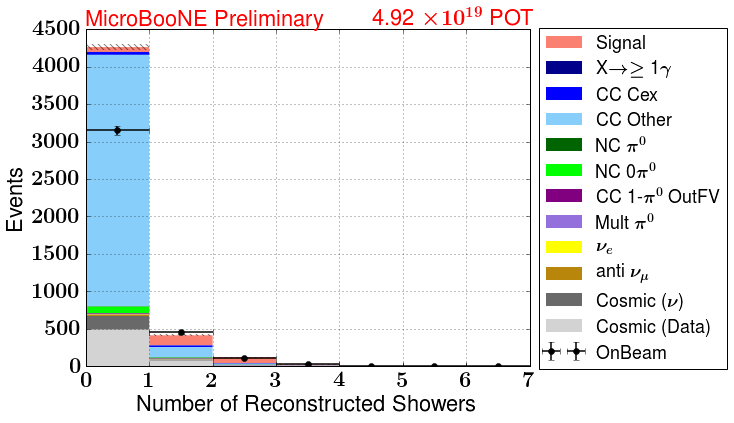

In [45]:
makeOnOffPlots('nshrs',0,7,nbins=7,xlabel='Number of Reconstructed Showers',unit='empty')

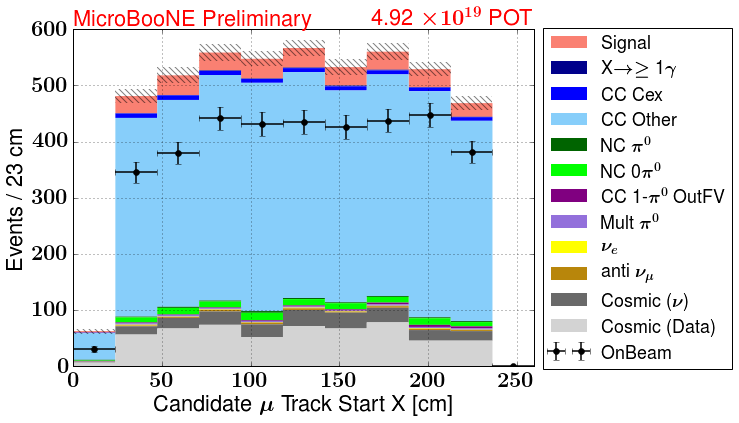

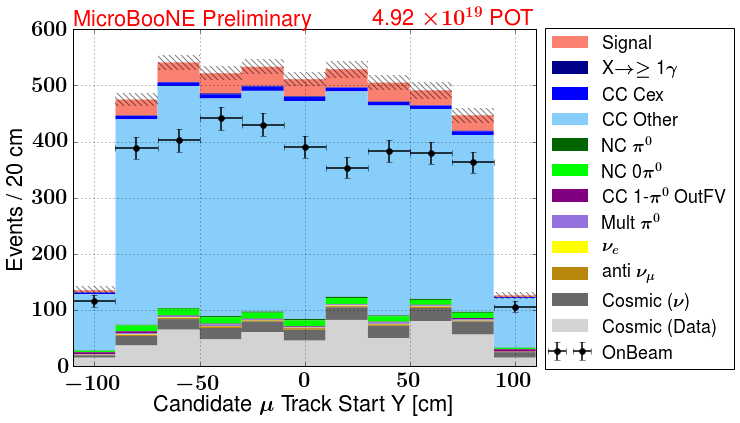

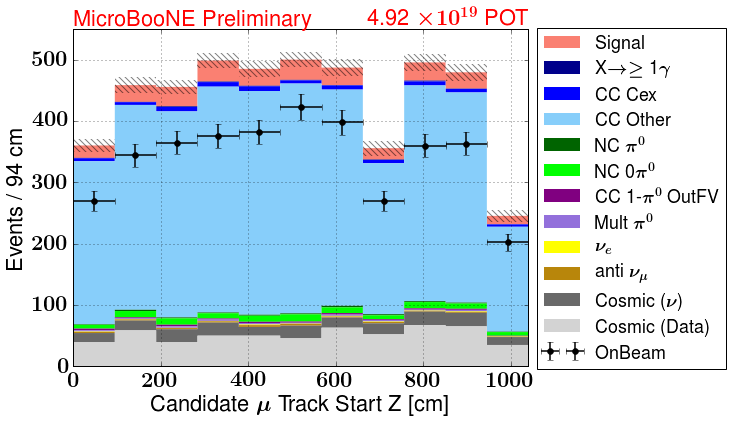

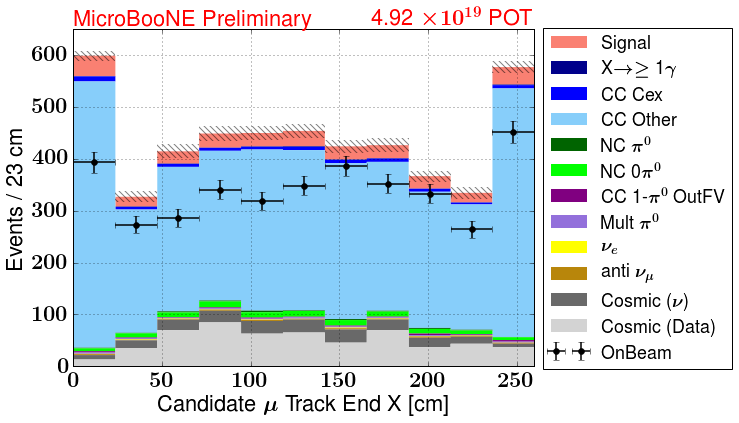

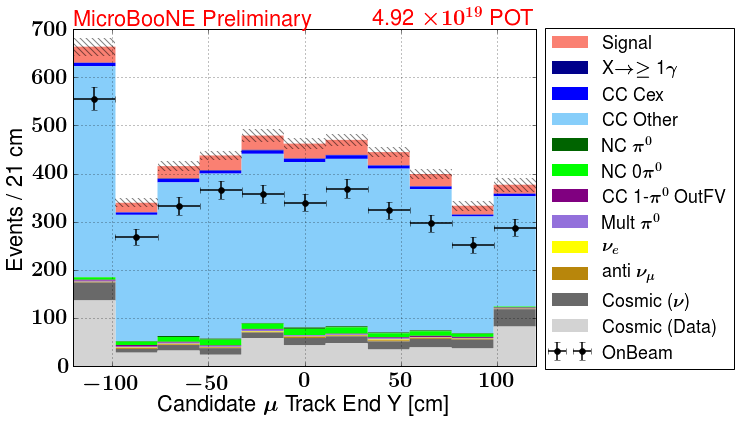

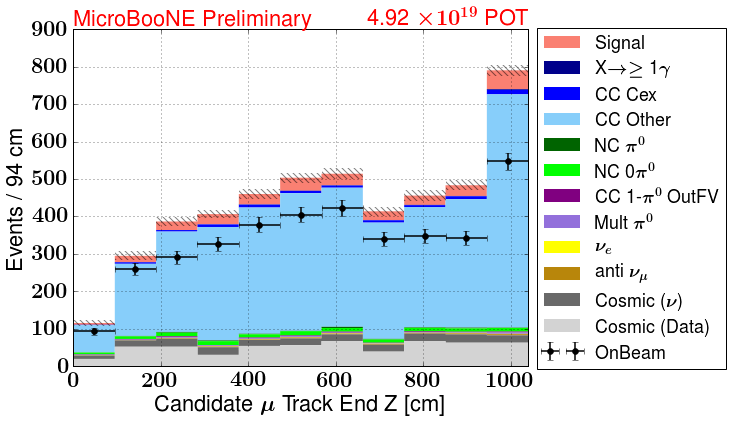

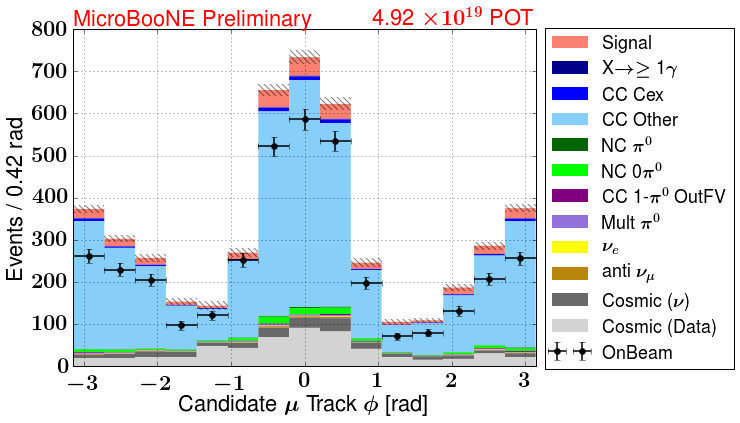

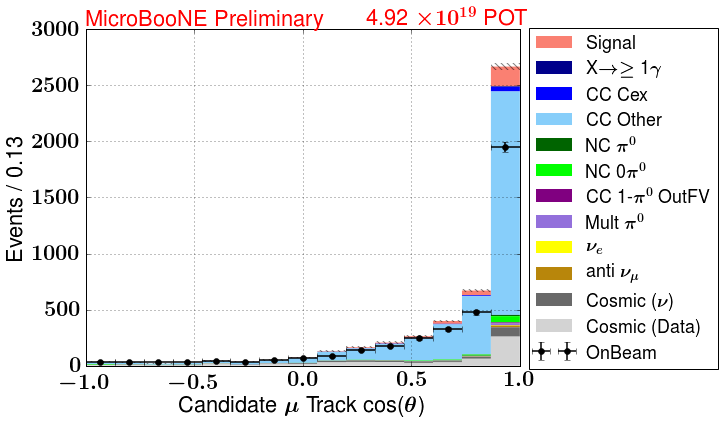

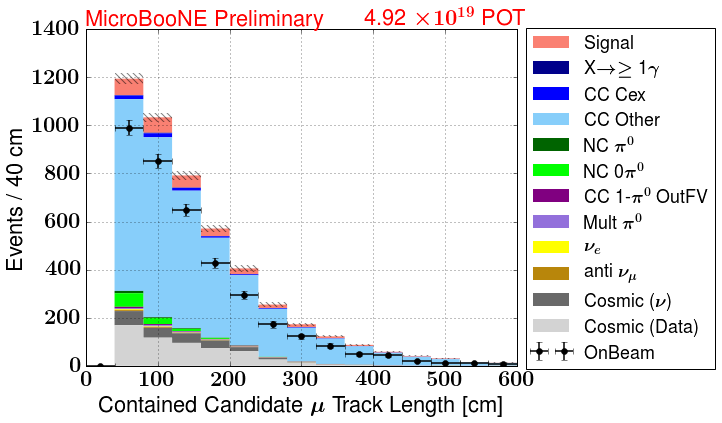

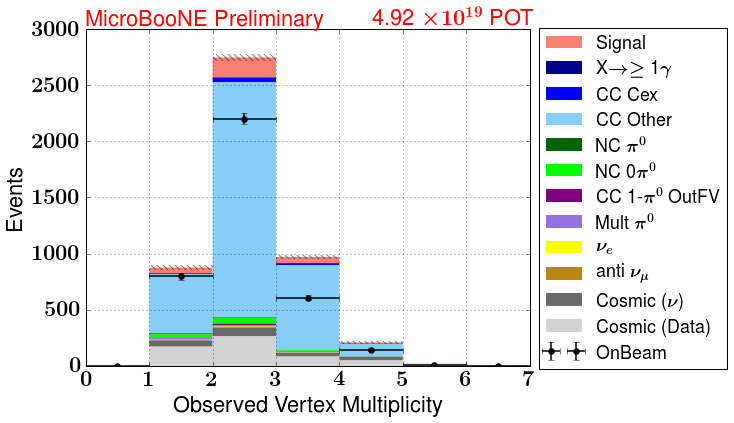

In [46]:
makeOnOffPlots('mu_startx',0,260,nbins=11,xlabel='Candidate $\mu$ Track Start X [cm]')
makeOnOffPlots('mu_starty',-110,110,nbins=11,xlabel='Candidate $\mu$ Track Start Y [cm]')
makeOnOffPlots('mu_startz',0,1040,nbins=11,xlabel='Candidate $\mu$ Track Start Z [cm]')
makeOnOffPlots('mu_endx',0,260,nbins=11,xlabel='Candidate $\mu$ Track End X [cm]')
makeOnOffPlots('mu_endy',-120,120,nbins=11,xlabel='Candidate $\mu$ Track End Y [cm]')
makeOnOffPlots('mu_endz',0,1040,nbins=11,xlabel='Candidate $\mu$ Track End Z [cm]')

makeOnOffPlots('mu_phi',-3.14,3.14,nbins=15,xlabel='Candidate $\mu$ Track $\\phi$ [rad]',unit='rad')
makeOnOffPlots('mu_angle',-1,1,nbins=15,xlabel='Candidate $\mu$ Track cos($\\theta$)',unit='cos(stuff)')
makeOnOffPlots('mu_len',0,600,nbins=15,xlabel='Contained Candidate $\mu$ Track Length [cm]')
makeOnOffPlots('mult',0,7,nbins=7,xlabel='Observed Vertex Multiplicity',unit='empty')

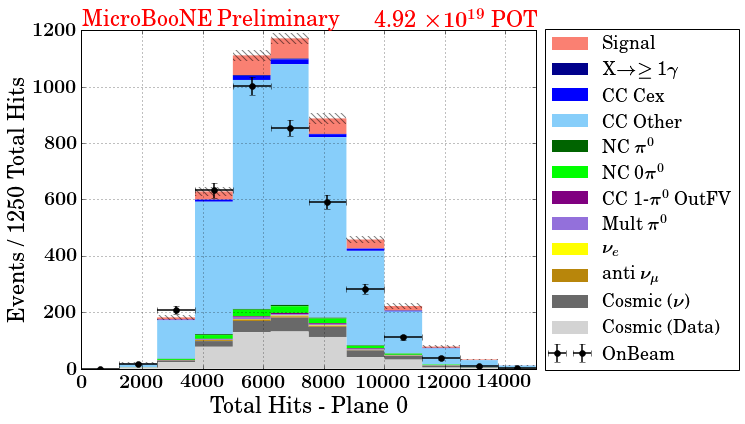

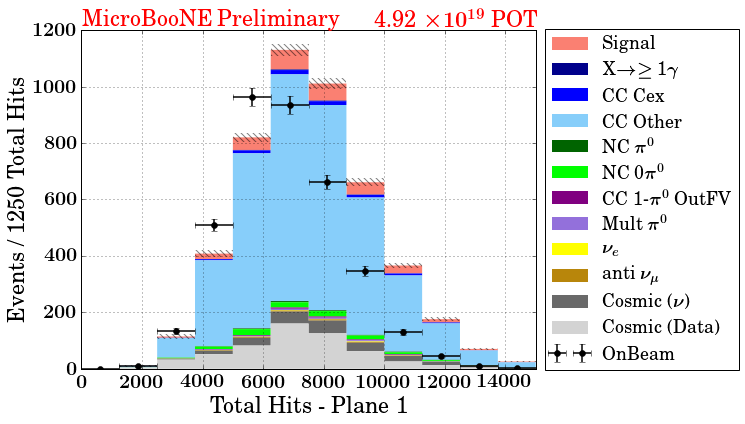

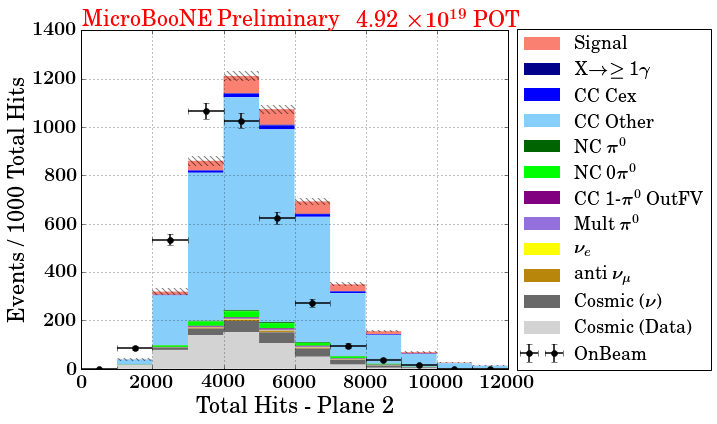

In [95]:
#makeOnOffPlots('tot_hits_0',0,12000,xlabel='#Total Hits - Plane 0')
#makeOnOffPlots('tot_hits_1',0,15000,xlabel='#Total Hits - Plane 1')
#makeOnOffPlots('tot_hits_2',0,12000,xlabel='#Total Hits - Plane 2')

#pi0 cuts
makeOnOffPlots('tot_hits_0',0,15000,nbins=12,xlabel='#Total Hits - Plane 0',unit='Total Hits')
makeOnOffPlots('tot_hits_1',0,15000,nbins=12,xlabel='#Total Hits - Plane 1',unit='Total Hits')
makeOnOffPlots('tot_hits_2',0,12000,nbins=12,xlabel='#Total Hits - Plane 2',unit='Total Hits')

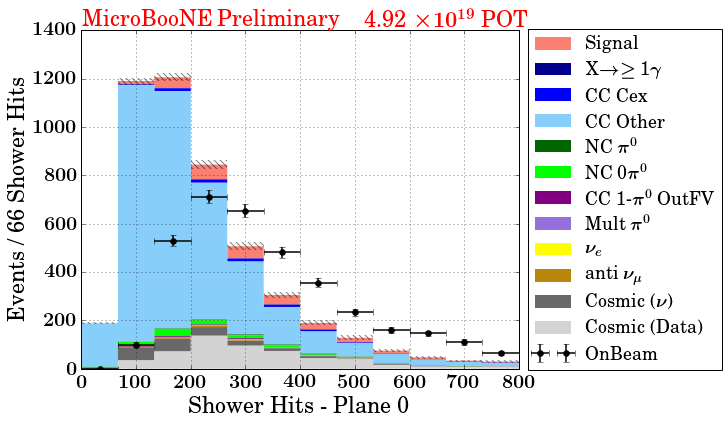

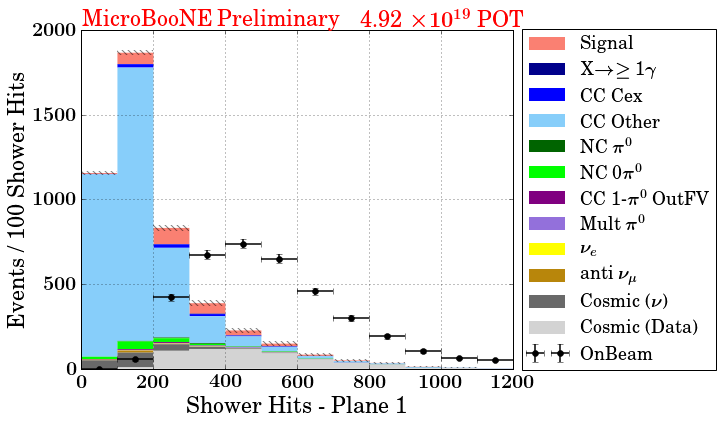

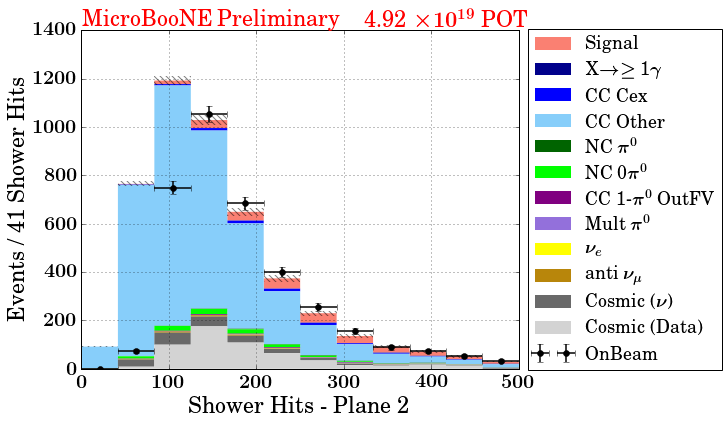

In [99]:
makeOnOffPlots('n_shower_hits_0',0,800,nbins=12,xlabel='#Shower Hits - Plane 0',unit='Shower Hits')
makeOnOffPlots('n_shower_hits_1',0,1200,nbins=12,xlabel='#Shower Hits - Plane 1',unit='Shower Hits')
makeOnOffPlots('n_shower_hits_2',0,500,nbins=12,xlabel='#Shower Hits - Plane 2',unit='Shower Hits')

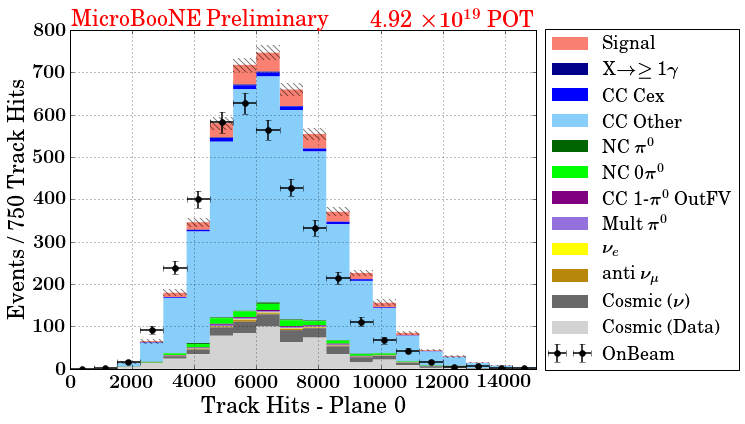

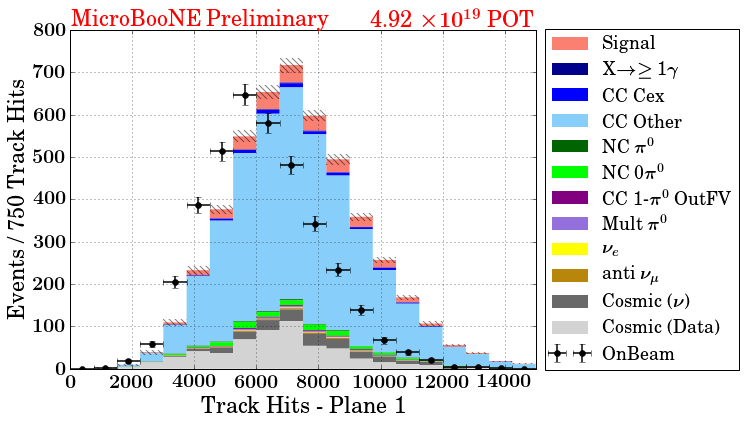

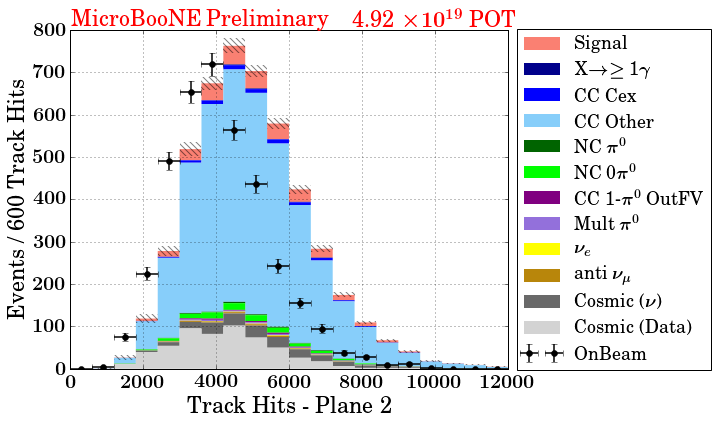

In [103]:
makeOnOffPlots('n_track_hits_0',0,15000,xlabel='#Track Hits - Plane 0',unit='Track Hits')
makeOnOffPlots('n_track_hits_1',0,15000,xlabel='#Track Hits - Plane 1',unit='Track Hits')
makeOnOffPlots('n_track_hits_2',0,12000,xlabel='#Track Hits - Plane 2',unit='Track Hits')

In [17]:
stage ='sel2'

f = '/Volumes/UBooNEDataMCC8/MCC8_3/AnaFiles/MCBNBCos/BT_backgrounds_%s.root'%stage
on ='/Volumes/UBooNEDataMCC8/MCC8_3/AnaFiles/OnBeam/BT_backgrounds_%s.root'%stage
off='/Volumes/UBooNEDataMCC8/MCC8_3/AnaFiles/OffBeam/BT_backgrounds_%s.root'%stage

t = rn.root2array(f,treename='shower_tree')
df = pd.DataFrame(t)
#df = df.query('shr_energy > 0. ')

a = rn.root2array(on,treename='shower_tree')
df0 = pd.DataFrame(a)
#df0 = df0.query('shr_energy > 0. ')

b = rn.root2array(off,treename='shower_tree')
df1 = pd.DataFrame(b)
#df1 = df1.query('shr_energy > 0. ')

#stage = 'sel2'

In [18]:
oth_v = df.query('bkgd_id == 0') #noise
cos_v = df.query('bkgd_id == 1')
cc1pi0_v = df.query('bkgd_id == 2')
nc1pi0_v = df.query('bkgd_id == 3')
cc1pi0_outFV_v = df.query('bkgd_id == 4')
multpi0_v = df.query('bkgd_id == 5')
nue_v = df.query('bkgd_id == 6')
antinumu_v = df.query('bkgd_id == 7')
cccex_v = df.query('bkgd_id == 8 ')
nccex_v = df.query('bkgd_id == 9')
ccgamma_v = df.query('bkgd_id == 10')
kaon_v = df.query('bkgd_id == 11')
ccoth_v = df.query('bkgd_id == 12 or bkgd_id == 11')
ncoth_v = df.query('bkgd_id == 13 or bkgd_id == 9')

all_but_sig_v = df.query('bkgd_id != 2')

In [19]:
var = 'bkgd_id'

oth_w = [ mc_to_onbeam for i in xrange(len(oth_v[var].values)) ] 
cos_w = [ mc_to_onbeam for i in xrange(len(cos_v[var].values)) ] 
nc1pi0_w = [ mc_to_onbeam for i in xrange(len(nc1pi0_v[var].values)) ] 
cc1pi0_outFV_w = [ mc_to_onbeam for i in xrange(len(cc1pi0_outFV_v[var].values)) ] 
multpi0_w = [ mc_to_onbeam for i in xrange(len(multpi0_v[var].values)) ] 
nue_w = [ mc_to_onbeam for i in xrange(len(nue_v[var].values)) ] 
antinumu_w = [ mc_to_onbeam for i in xrange(len(antinumu_v[var].values)) ] 
cccex_w = [ mc_to_onbeam for i in xrange(len(cccex_v[var].values)) ] 
nccex_w = [ mc_to_onbeam for i in xrange(len(nccex_v[var].values)) ] 
ccgamma_w = [ mc_to_onbeam for i in xrange(len(ccgamma_v[var].values)) ] 
kaon_w = [ mc_to_onbeam for i in xrange(len(kaon_v[var].values)) ] 
ccoth_w = [ mc_to_onbeam for i in xrange(len(ccoth_v[var].values)) ] 
ncoth_w = [ mc_to_onbeam for i in xrange(len(ncoth_v[var].values)) ] 
sig_w = [ mc_to_onbeam for i in xrange(len(cc1pi0_v[var].values)) ] 

cos_ext_w = [ off_to_on for i in xrange(df1.shape[0]) ] 


#weights= []
all_w = [ mc_to_onbeam for i in xrange(len(df[var].values)) ] 
#print len(weights)

tot = len(all_w) * mc_to_onbeam + len(cos_ext_w) * off_to_on
print tot

747.332480346


In [24]:
print '\nSignal : ', len(sig_w) * mc_to_onbeam /tot

print '\nBackgorunds (CC 0 pi0): '
print ' CC Cex : ', len(cccex_w)*mc_to_onbeam / tot
print ' CC gamma : ', len(ccgamma_w)*mc_to_onbeam  / tot
print ' Kaon : ', len(kaon_w)*mc_to_onbeam / tot
print ' CCOther : ', len(ccoth_w) * mc_to_onbeam / tot

print '\nBackgorunds (NC >=1 pi0): '
print ' NC 1pi0 : ', len(nc1pi0_w)*mc_to_onbeam / tot

print '\nBackgorunds (NC 0 pi0): '
print ' NC Cex : ', len(nccex_w)*mc_to_onbeam / tot
print ' NCOther : ', len(ncoth_w)*mc_to_onbeam / tot

print '\nBackgorunds (Other): '
print ' CC 1pi0 out FV : ', len(cc1pi0_outFV_w)*mc_to_onbeam / tot
print ' Multiple pi0 : ', len(multpi0_w)*mc_to_onbeam / tot
print ' Nue : ', len(nue_w)*mc_to_onbeam / tot
print ' Antinumu : ', len(antinumu_w)*mc_to_onbeam / tot

print '\nBackgorunds (Cosmics): '
print ' No MCT Match : ', len(oth_w) *mc_to_onbeam  / tot
print ' Cosmic (Data) : ', len(cos_ext_w) * off_to_on / tot



Signal :  0.448939218136

Backgorunds (CC 0 pi0): 
 CC Cex :  0.0482228543389
 CC gamma :  0.0171113354106
 Kaon :  0.00311115189283
 CCOther :  0.228980779312

Backgorunds (NC >=1 pi0): 
 NC 1pi0 :  0.0241114271694

Backgorunds (NC 0 pi0): 
 NC Cex :  0.00700009175887
 NCOther :  0.0147779714909

Backgorunds (Other): 
 CC 1pi0 out FV :  0.0158668746534
 Multiple pi0 :  0.0588007707745
 Nue :  0.00746676454279
 Antinumu :  0.0037333822714

Backgorunds (Cosmics): 
 No MCT Match :  0.0
 Cosmic (Data) :  0.104454927649


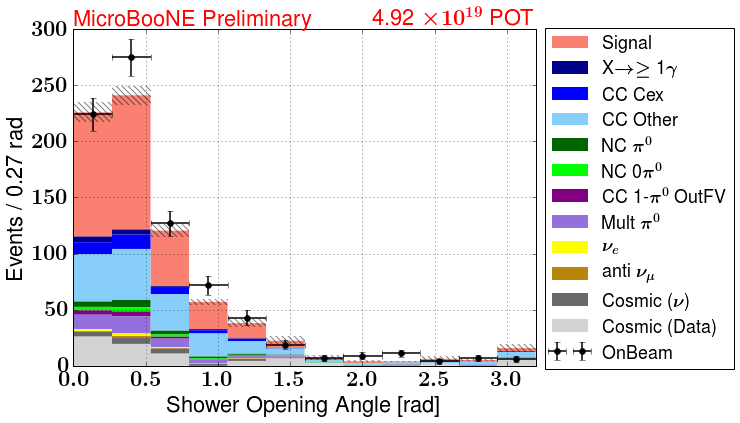

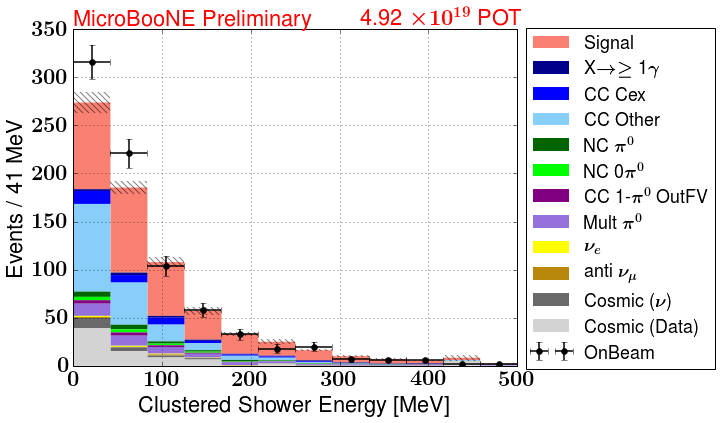

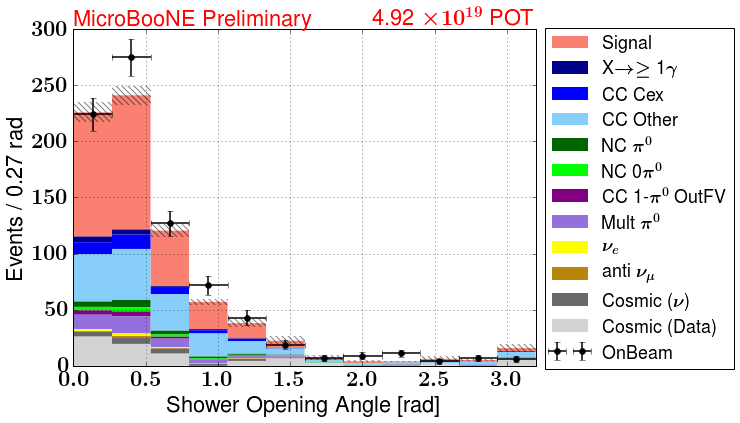

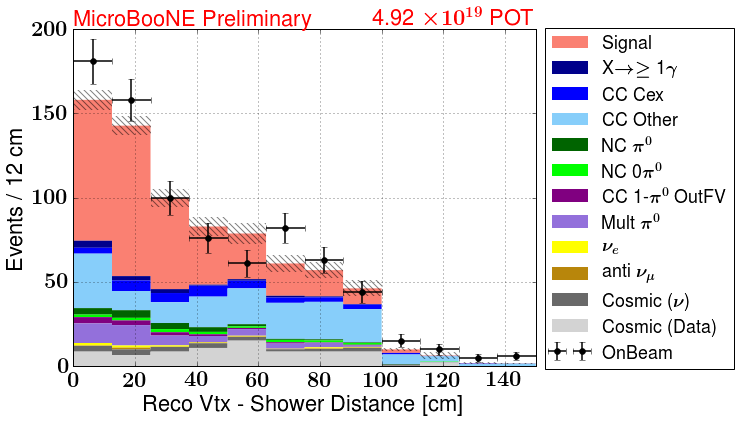

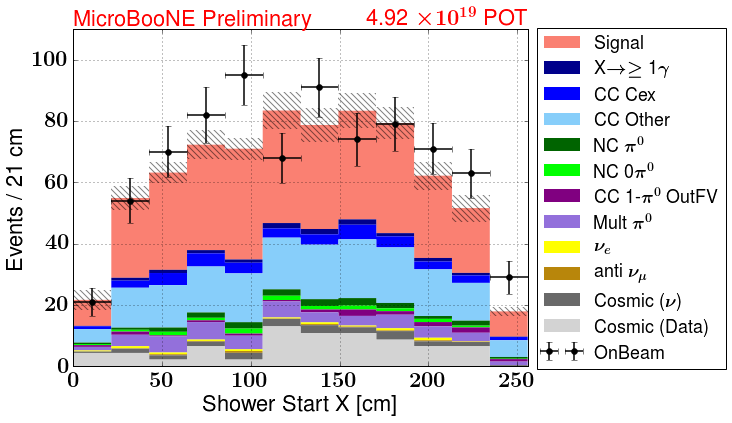

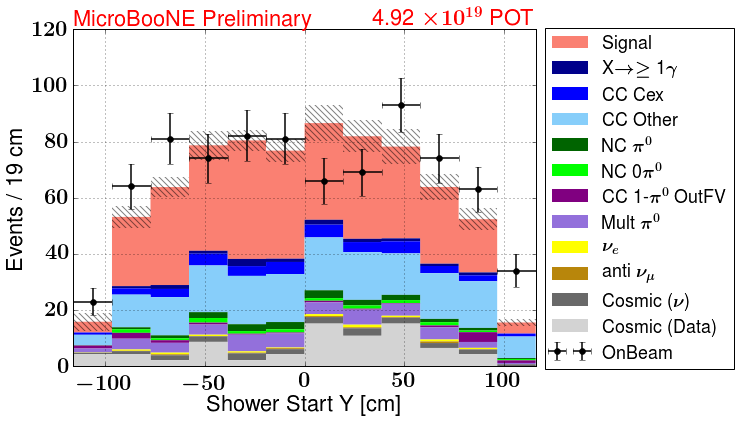

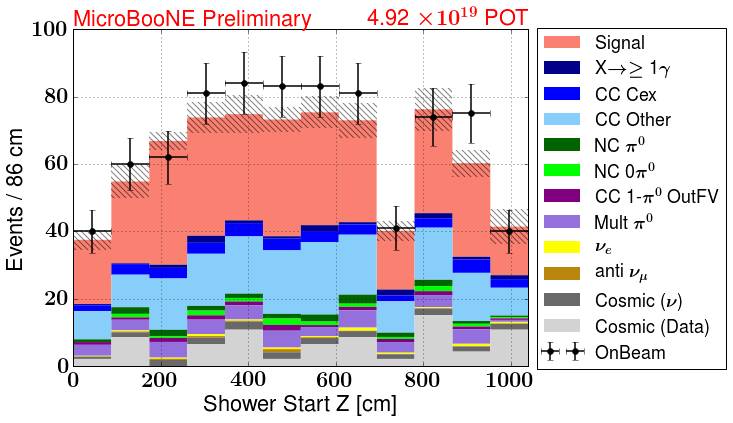

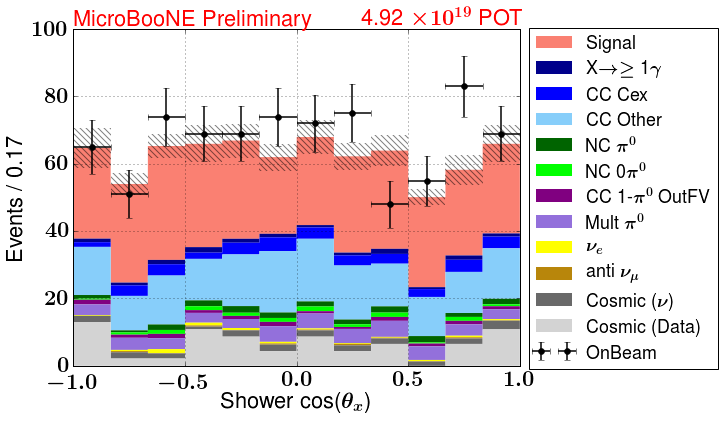

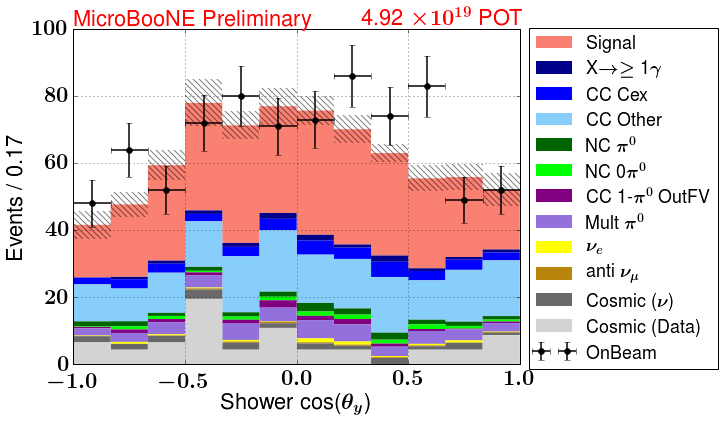

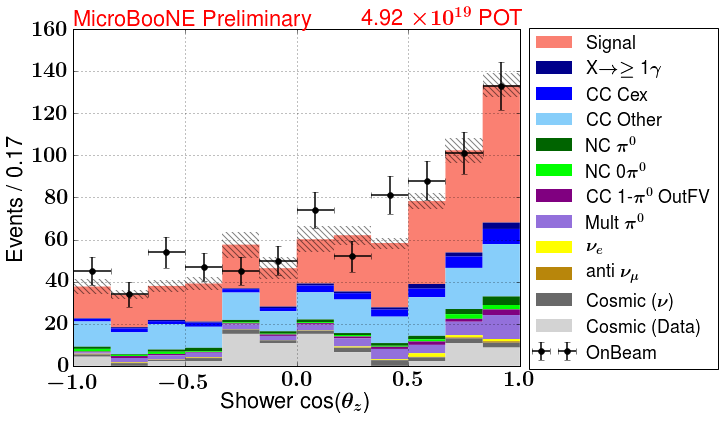

In [25]:
makeOnOffPlots('shr_oangle',0,3.2,nbins=12,xlabel='Shower Opening Angle [rad]',unit='rad')
makeOnOffPlots('shr_energy',0,500,nbins=12,xlabel='Clustered Shower Energy [MeV]',unit='MeV')

makeOnOffPlots('shr_oangle',0,3.2,nbins=12,xlabel='Shower Opening Angle [rad]',unit='rad')
makeOnOffPlots('shr_vtx_dist',0,150,nbins=12,xlabel='Reco Vtx - Shower Distance [cm]')

makeOnOffPlots('shr_startx',0,256,nbins=12,xlabel='Shower Start X [cm]')
makeOnOffPlots('shr_starty',-116,116,nbins=12,xlabel='Shower Start Y [cm]')
makeOnOffPlots('shr_startz',0,1040,nbins=12,xlabel='Shower Start Z [cm]')
makeOnOffPlots('shr_dirx',-1,1,nbins=12,xlabel='Shower cos($\\theta_x$)',unit='cos($\\theta_x$)')
makeOnOffPlots('shr_diry',-1,1,nbins=12,xlabel='Shower cos($\\theta_y$)',unit='cos($\\theta_y$)')
makeOnOffPlots('shr_dirz',-1,1,nbins=12,xlabel='Shower cos($\\theta_z$)',unit='cos($\\theta_z$)')

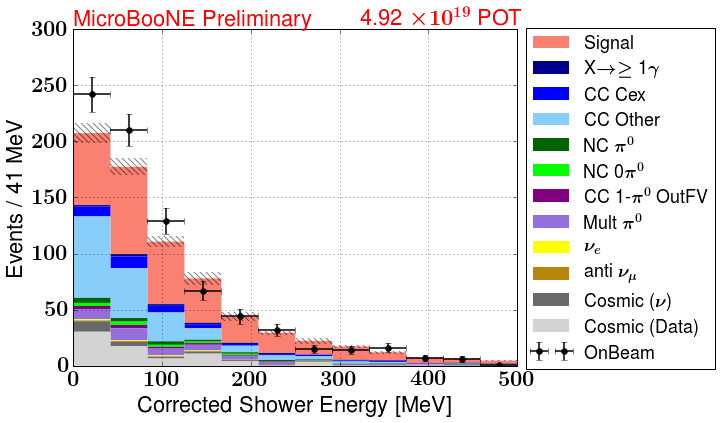

In [45]:
df0['shr_energy_corr'] = df0['shr_energy'] / 0.77
df1['shr_energy_corr'] = df1['shr_energy'] / 0.77
df['shr_energy_corr'] = df['shr_energy'] / 0.77

oth_v = df.query('bkgd_id == 0') #noise
cos_v = df.query('bkgd_id == 1')
cc1pi0_v = df.query('bkgd_id == 2')
nc1pi0_v = df.query('bkgd_id == 3')
cc1pi0_outFV_v = df.query('bkgd_id == 4')
multpi0_v = df.query('bkgd_id == 5')
nue_v = df.query('bkgd_id == 6')
antinumu_v = df.query('bkgd_id == 7')
cccex_v = df.query('bkgd_id == 8 ')
nccex_v = df.query('bkgd_id == 9')
ccgamma_v = df.query('bkgd_id == 10')
kaon_v = df.query('bkgd_id == 11')
ccoth_v = df.query('bkgd_id == 12 or bkgd_id == 11')
ncoth_v = df.query('bkgd_id == 13 or bkgd_id == 9')

all_but_sig_v = df.query('bkgd_id != 2')

makeOnOffPlots('shr_energy_corr',0,500,nbins=12,xlabel='Corrected Shower Energy [MeV]',unit='MeV')
#makeOnOffPlots('shr_energy_corr',0,300,xlabel='Corrected Shower Energy [MeV]')